In [1]:
# 1️⃣ Import libraries
import pandas as pd
import numpy as np

# 2️⃣ Load dataset (change the path if needed)
df = pd.read_csv(r"C:\Users\Pranav\Downloads\archive (7).zip")  # If your file name is different, update it

# 3️⃣ Basic dataset info
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())

print("\n--- Data Types & Non-Null Counts ---")
print(df.info())

print("\n--- First 5 rows ---")
print(df.head())

print("\n--- Statistical Summary ---")
print(df.describe())

# 4️⃣ Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# 5️⃣ Unique values per column
print("\n--- Unique Values Per Column ---")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Shape of dataset: (1025, 14)

Column names:
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

--- Data Types & Non-Null Counts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

--- 

Decision Tree Accuracy: 0.9853658536585366


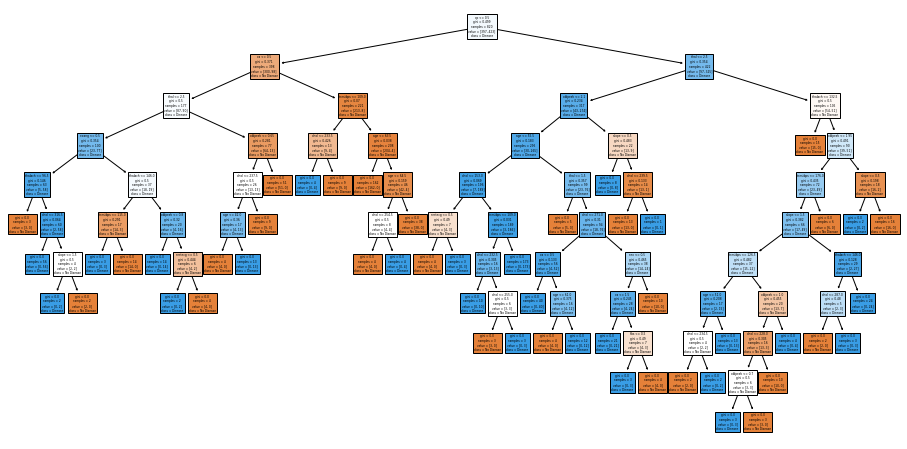

In [2]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Split data
X = df.drop("target", axis=1)  # Features
y = df["target"]               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

# Visualization of Tree
plt.figure(figsize=(16,8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.show()


In [8]:
# Train with limited depth to prevent overfitting
dt_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_limited.fit(X_train, y_train)

y_pred_limited = dt_limited.predict(X_test)

print("Decision Tree (Max Depth=3) Accuracy:", accuracy_score(y_test, y_pred_limited))

# Compare train vs test accuracy
print("Train Accuracy (full depth):", dt.score(X_train, y_train))
print("Test Accuracy (full depth):", dt.score(X_test, y_test))
print("Train Accuracy (max depth=3):", dt_limited.score(X_train, y_train))
print("Test Accuracy (max depth=3):", dt_limited.score(X_test, y_test))


Decision Tree (Max Depth=3) Accuracy: 0.7804878048780488
Train Accuracy (full depth): 1.0
Test Accuracy (full depth): 0.9853658536585366
Train Accuracy (max depth=3): 0.8512195121951219
Test Accuracy (max depth=3): 0.7804878048780488


In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366


     Feature  Importance
2         cp    0.135072
11        ca    0.127327
7    thalach    0.122169
9    oldpeak    0.121905
12      thal    0.110518
0        age    0.077908
4       chol    0.074822
3   trestbps    0.071171
8      exang    0.057594
10     slope    0.045782
1        sex    0.028731
6    restecg    0.018557
5        fbs    0.008444


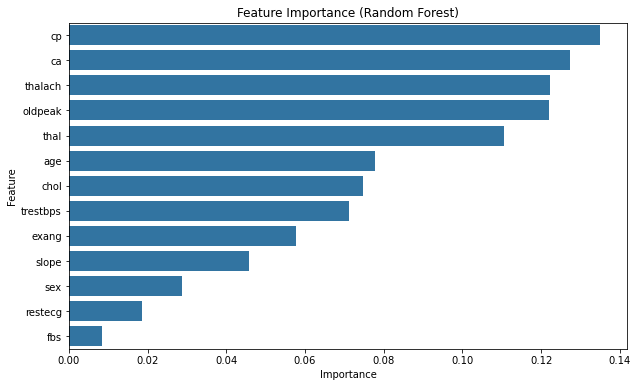

In [5]:
# Get feature importances from Random Forest
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display
print(feature_importance_df)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title("Feature Importance (Random Forest)")
plt.show()


In [6]:
from sklearn.model_selection import cross_val_score

# Decision Tree CV
dt_cv_scores = cross_val_score(dt_limited, X, y, cv=5)
print("Decision Tree CV Mean Accuracy:", dt_cv_scores.mean())

# Random Forest CV
rf_cv_scores = cross_val_score(rf, X, y, cv=5)
print("Random Forest CV Mean Accuracy:", rf_cv_scores.mean())


Decision Tree CV Mean Accuracy: 0.8302439024390245
Random Forest CV Mean Accuracy: 0.9970731707317073
